In [10]:
import matplotlib.pyplot as plt
decisionNode=dict(boxstyle="sawtooth",fc="0.8")
leafNode=dict(boxstyle="round4",fc="0.8")
arrow_args=dict(arrowstyle="<-")


#计算树的叶子节点数量
def getNumLeafs(myTree):
    numLeafs=0
    firstStr=list(myTree.keys())[0]
    secondDict=myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':
            numLeafs+=getNumLeafs(secondDict[key])
        else: numLeafs+=1
    return numLeafs

#计算树的最大深度
def getTreeDepth(myTree):
    maxDepth=0
    firstStr=list(myTree.keys())[0]
    secondDict=myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':
            thisDepth=1+getTreeDepth(secondDict[key])
        else: thisDepth=1
        if thisDepth>maxDepth:
            maxDepth=thisDepth
    return maxDepth

#画节点
def plotNode(nodeTxt,centerPt,parentPt,nodeType):
    createPlot.ax1.annotate(nodeTxt,xy=parentPt,xycoords='axes fraction',\
    xytext=centerPt,textcoords='axes fraction',va="center", ha="center",\
    bbox=nodeType,arrowprops=arrow_args)

#画箭头上的文字
def plotMidText(cntrPt,parentPt,txtString):
    lens=len(txtString)
    xMid=(parentPt[0]+cntrPt[0])/2.0-lens*0.002
    yMid=(parentPt[1]+cntrPt[1])/2.0
    createPlot.ax1.text(xMid,yMid,txtString)
    
def plotTree(myTree,parentPt,nodeTxt):
    numLeafs=getNumLeafs(myTree)
    depth=getTreeDepth(myTree)
    firstStr=list(myTree.keys())[0]
    cntrPt=(plotTree.x0ff+(1.0+float(numLeafs))/2.0/plotTree.totalW,plotTree.y0ff)
    plotMidText(cntrPt,parentPt,nodeTxt)
    plotNode(firstStr,cntrPt,parentPt,decisionNode)
    secondDict=myTree[firstStr]
    plotTree.y0ff=plotTree.y0ff-1.0/plotTree.totalD
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':
            plotTree(secondDict[key],cntrPt,str(key))
        else:
            plotTree.x0ff=plotTree.x0ff+1.0/plotTree.totalW
            plotNode(secondDict[key],(plotTree.x0ff,plotTree.y0ff),cntrPt,leafNode)
            plotMidText((plotTree.x0ff,plotTree.y0ff),cntrPt,str(key))
    plotTree.y0ff=plotTree.y0ff+1.0/plotTree.totalD

def createPlot(inTree):
    fig=plt.figure(1,facecolor='white')
    fig.clf()
    axprops=dict(xticks=[],yticks=[])
    createPlot.ax1=plt.subplot(111,frameon=False,**axprops)
    plotTree.totalW=float(getNumLeafs(inTree))
    plotTree.totalD=float(getTreeDepth(inTree))
    plotTree.x0ff=-0.5/plotTree.totalW
    plotTree.y0ff=1.0
    plotTree(inTree,(0.5,1.0),'')
    plt.show()
createPlot(myTree)

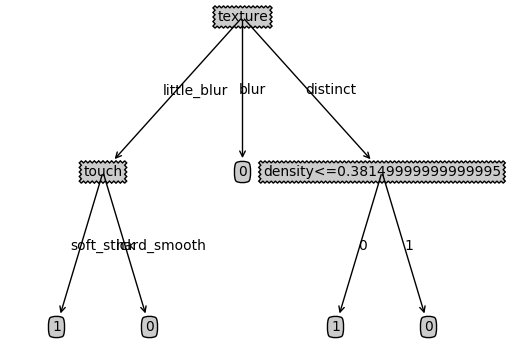